#Exploratory Data Analysis 



### General Dependancies

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as colors
import matplotlib.cm as cmx

### Custom functions

In [3]:
#define data loader functions

def data_prep(df):
    df = df.astype({"id_spatial": "category", "Island": "category", "Habitat_Modification": "category", 
               "Invasive_Algae": "category", "Regime": "category"})
    return df


def load_coral_data(complete=True, CV=True, convert_to_categorical=True):
    if complete:
        df = pd.read_csv("/content/drive/My Drive/SMA project/Hawaiian_Predictors_revised.csv")
        train = pd.read_csv("/content/drive/My Drive/SMA project/Predictors_revised_train.csv")
        val = pd.read_csv("/content/drive/My Drive/SMA project/Predictors_revised_val.csv")
        test = pd.read_csv("/content/drive/My Drive/SMA project/Predictors_revised_test.csv")

    if convert_to_categorical:
        df = data_prep(df)
        train = data_prep(train)
        val = data_prep(val)
        test = data_prep(test)
        
    if CV:
        train = train.append(val)
        train = train.sample(frac=1).reset_index(drop=True)
        return df, train, test
    
    return df, train, val, test

In [4]:
from matplotlib.lines import Line2D

legend_benthic = [Line2D([0], [0], color='mediumvioletred', lw=4, label='Coral'),
                   Line2D([0], [0], color='lightcoral', lw=4, label='CCA'),
                   Line2D([0], [0], color='seagreen', lw=4, label='Turf'),
                   Line2D([0], [0], color='gold', lw=4, label='Macro'),
                   Line2D([0], [0], color='aqua', lw=4, label='Other'),]

legend_fish = [Line2D([0], [0], color='mediumpurple', lw=4, label='Grazers'),
                   Line2D([0], [0], color='steelblue', lw=4, label='Scrapers'),
                   Line2D([0], [0], color='dimgrey', lw=4, label='Browsers'),
                   Line2D([0], [0], color='rosybrown', lw=4, label='Predators'),
                   Line2D([0], [0], color='purple', lw=4, label='Secondary Consumers'),]


In [5]:

#define kde plotter 1

def kde_benthic(data_kde):

  print('\n Kernel Density Estimation Plot for Benthic communities in Coral Regimes \n')
  print('Would you like to see the KDE plot with mean or median markers?')
  ans = input('Press 1 for mean and 2 for median: ')

  print('\n Plotting... \n')

  if ans=='1':
    print('\n Benthic community KDE across 4 regimes with mean markers \n')
    f, axes = plt.subplots(4, 1, figsize=(30, 15), sharex=True)
    plt.xlim(-150,150)
    plt.ylim(0,0.2)
    plt.ylabel('Density')
    plt.xlabel('% Cover')
    axes[0].legend(handles=legend_benthic, loc='best')
    sns.despine(left=True)

    sns.kdeplot(data_kde[data_kde['Regime']==1]['Coral'],shade=True,ax=axes[0], color = 'mediumvioletred').set_title('Regime 1')
    sns.kdeplot(data_kde[data_kde['Regime']==1]['CCA'],shade = True,ax=axes[0],color = 'lightcoral')
    sns.kdeplot(data_kde[data_kde['Regime']==1]['Turf'],shade = True,ax=axes[0],color = 'seagreen')
    sns.kdeplot(data_kde[data_kde['Regime']==1]['Macro'],shade = True,ax=axes[0],color = 'gold')
    sns.kdeplot(data_kde[data_kde['Regime']==1]['Other'],shade = True,ax=axes[0],color='aqua')

    coralmu1=data_kde[data_kde['Regime']==1]['Coral'].mean()
    ccamu1=data_kde[data_kde['Regime']==1]['CCA'].mean()
    turfmu1=data_kde[data_kde['Regime']==1]['Turf'].mean()
    macromu1=data_kde[data_kde['Regime']==1]['Macro'].mean()
    othermu1=data_kde[data_kde['Regime']==1]['Other'].mean()

    axes[0].axvline(coralmu1, color='mediumvioletred', linestyle='--')
    axes[0].axvline(ccamu1, color='lightcoral', linestyle='--')
    axes[0].axvline(turfmu1, color='seagreen', linestyle='--')
    axes[0].axvline(macromu1, color='gold', linestyle='--')
    axes[0].axvline(othermu1, color='aqua', linestyle='--')

    ###################################################################################

    sns.kdeplot(data_kde[data_kde['Regime']==2]['Coral'],shade=True,ax=axes[1], color = 'mediumvioletred').set_title('Regime 2')
    sns.kdeplot(data_kde[data_kde['Regime']==2]['CCA'],shade = True,ax=axes[1],color = 'lightcoral')
    sns.kdeplot(data_kde[data_kde['Regime']==2]['Turf'],shade = True,ax=axes[1],color = 'seagreen')
    sns.kdeplot(data_kde[data_kde['Regime']==2]['Macro'],shade = True,ax=axes[1],color = 'gold')
    sns.kdeplot(data_kde[data_kde['Regime']==2]['Other'],shade = True,ax=axes[1],color='aqua')

    coralmu1=data_kde[data_kde['Regime']==2]['Coral'].mean()
    ccamu1=data_kde[data_kde['Regime']==2]['CCA'].mean()
    turfmu1=data_kde[data_kde['Regime']==2]['Turf'].mean()
    macromu1=data_kde[data_kde['Regime']==2]['Macro'].mean()
    othermu1=data_kde[data_kde['Regime']==2]['Other'].mean()

    axes[1].axvline(coralmu1, color='mediumvioletred', linestyle='--')
    axes[1].axvline(ccamu1, color='lightcoral', linestyle='--')
    axes[1].axvline(turfmu1, color='seagreen', linestyle='--')
    axes[1].axvline(macromu1, color='gold', linestyle='--')
    axes[1].axvline(othermu1, color='aqua', linestyle='--')
    
    ###################################################################################

    sns.kdeplot(data_kde[data_kde['Regime']==3]['Coral'],shade=True,ax=axes[2], color = 'mediumvioletred').set_title('Regime 3')
    sns.kdeplot(data_kde[data_kde['Regime']==3]['CCA'],shade = True,ax=axes[2],color = 'lightcoral')
    sns.kdeplot(data_kde[data_kde['Regime']==3]['Turf'],shade = True,ax=axes[2],color = 'seagreen')
    sns.kdeplot(data_kde[data_kde['Regime']==3]['Macro'],shade = True,ax=axes[2],color = 'gold')
    sns.kdeplot(data_kde[data_kde['Regime']==3]['Other'],shade = True,ax=axes[2],color='aqua')

    coralmu1=data_kde[data_kde['Regime']==3]['Coral'].mean()
    ccamu1=data_kde[data_kde['Regime']==3]['CCA'].mean()
    turfmu1=data_kde[data_kde['Regime']==3]['Turf'].mean()
    macromu1=data_kde[data_kde['Regime']==3]['Macro'].mean()
    othermu1=data_kde[data_kde['Regime']==3]['Other'].mean()

    axes[2].axvline(coralmu1, color='mediumvioletred', linestyle='--')
    axes[2].axvline(ccamu1, color='lightcoral', linestyle='--')
    axes[2].axvline(turfmu1, color='seagreen', linestyle='--')
    axes[2].axvline(macromu1, color='gold', linestyle='--')
    axes[2].axvline(othermu1, color='aqua', linestyle='--')
    ###################################################################################

    sns.kdeplot(data_kde[data_kde['Regime']==5]['Coral'],shade=True,ax=axes[3], color = 'mediumvioletred').set_title('Regime 5')
    sns.kdeplot(data_kde[data_kde['Regime']==5]['CCA'],shade = True,ax=axes[3],color = 'lightcoral')
    sns.kdeplot(data_kde[data_kde['Regime']==5]['Turf'],shade = True,ax=axes[3],color = 'seagreen')
    sns.kdeplot(data_kde[data_kde['Regime']==5]['Macro'],shade = True,ax=axes[3],color = 'gold')
    sns.kdeplot(data_kde[data_kde['Regime']==5]['Other'],shade = True,ax=axes[3],color='aqua')

    coralmu1=data_kde[data_kde['Regime']==5]['Coral'].mean()
    ccamu1=data_kde[data_kde['Regime']==5]['CCA'].mean()
    turfmu1=data_kde[data_kde['Regime']==5]['Turf'].mean()
    macromu1=data_kde[data_kde['Regime']==5]['Macro'].mean()
    othermu1=data_kde[data_kde['Regime']==5]['Other'].mean()

    axes[3].axvline(coralmu1, color='mediumvioletred', linestyle='--',label = 'mean1')
    axes[3].axvline(ccamu1, color='lightcoral', linestyle='--')
    axes[3].axvline(turfmu1, color='seagreen', linestyle='--')
    axes[3].axvline(macromu1, color='gold', linestyle='--')
    axes[3].axvline(othermu1, color='aqua', linestyle='--')

  else:
    print('Benthic community KDE across 4 regimes with median markers')
    f, axes = plt.subplots(4, 1, figsize=(30, 15), sharex=True)
    plt.xlim(-150,150)
    plt.ylim(0,0.2)
    plt.ylabel('Density')
    plt.xlabel('% Cover')
    axes[0].legend(handles=legend_benthic, loc='best')
    sns.despine(left=True)

    sns.kdeplot(data_kde[data_kde['Regime']==1]['Coral'],shade=True,ax=axes[0], color = 'mediumvioletred').set_title('Regime 1')
    sns.kdeplot(data_kde[data_kde['Regime']==1]['CCA'],shade = True,ax=axes[0],color = 'lightcoral')
    sns.kdeplot(data_kde[data_kde['Regime']==1]['Turf'],shade = True,ax=axes[0],color = 'seagreen')
    sns.kdeplot(data_kde[data_kde['Regime']==1]['Macro'],shade = True,ax=axes[0],color = 'gold')
    sns.kdeplot(data_kde[data_kde['Regime']==1]['Other'],shade = True,ax=axes[0],color='aqua')

    coralmu1=data_kde[data_kde['Regime']==1]['Coral'].median()
    ccamu1=data_kde[data_kde['Regime']==1]['CCA'].median()
    turfmu1=data_kde[data_kde['Regime']==1]['Turf'].median()
    macromu1=data_kde[data_kde['Regime']==1]['Macro'].median()
    othermu1=data_kde[data_kde['Regime']==1]['Other'].median()

    axes[0].axvline(coralmu1, color='mediumvioletred', linestyle='--')
    axes[0].axvline(ccamu1, color='lightcoral', linestyle='--')
    axes[0].axvline(turfmu1, color='seagreen', linestyle='--')
    axes[0].axvline(macromu1, color='gold', linestyle='--')
    axes[0].axvline(othermu1, color='aqua', linestyle='--')

    ###################################################################################

    sns.kdeplot(data_kde[data_kde['Regime']==2]['Coral'],shade=True,ax=axes[1], color = 'mediumvioletred').set_title('Regime 2')
    sns.kdeplot(data_kde[data_kde['Regime']==2]['CCA'],shade = True,ax=axes[1],color = 'lightcoral')
    sns.kdeplot(data_kde[data_kde['Regime']==2]['Turf'],shade = True,ax=axes[1],color = 'seagreen')
    sns.kdeplot(data_kde[data_kde['Regime']==2]['Macro'],shade = True,ax=axes[1],color = 'gold')
    sns.kdeplot(data_kde[data_kde['Regime']==2]['Other'],shade = True,ax=axes[1],color='aqua')

    coralmu1=data_kde[data_kde['Regime']==2]['Coral'].median()
    ccamu1=data_kde[data_kde['Regime']==2]['CCA'].median()
    turfmu1=data_kde[data_kde['Regime']==2]['Turf'].median()
    macromu1=data_kde[data_kde['Regime']==2]['Macro'].median()
    othermu1=data_kde[data_kde['Regime']==2]['Other'].median()

    axes[1].axvline(coralmu1, color='mediumvioletred', linestyle='--')
    axes[1].axvline(ccamu1, color='lightcoral', linestyle='--')
    axes[1].axvline(turfmu1, color='seagreen', linestyle='--')
    axes[1].axvline(macromu1, color='gold', linestyle='--')
    axes[1].axvline(othermu1, color='aqua', linestyle='--')
    ###################################################################################

    sns.kdeplot(data_kde[data_kde['Regime']==3]['Coral'],shade=True,ax=axes[2], color = 'mediumvioletred').set_title('Regime 3')
    sns.kdeplot(data_kde[data_kde['Regime']==3]['CCA'],shade = True,ax=axes[2],color = 'lightcoral')
    sns.kdeplot(data_kde[data_kde['Regime']==3]['Turf'],shade = True,ax=axes[2],color = 'seagreen')
    sns.kdeplot(data_kde[data_kde['Regime']==3]['Macro'],shade = True,ax=axes[2],color = 'gold')
    sns.kdeplot(data_kde[data_kde['Regime']==3]['Other'],shade = True,ax=axes[2],color='aqua')

    coralmu1=data_kde[data_kde['Regime']==3]['Coral'].median()
    ccamu1=data_kde[data_kde['Regime']==3]['CCA'].median()
    turfmu1=data_kde[data_kde['Regime']==3]['Turf'].median()
    macromu1=data_kde[data_kde['Regime']==3]['Macro'].median()
    othermu1=data_kde[data_kde['Regime']==3]['Other'].median()

    axes[2].axvline(coralmu1, color='mediumvioletred', linestyle='--')
    axes[2].axvline(ccamu1, color='lightcoral', linestyle='--')
    axes[2].axvline(turfmu1, color='seagreen', linestyle='--')
    axes[2].axvline(macromu1, color='gold', linestyle='--')
    axes[2].axvline(othermu1, color='aqua', linestyle='--')
    ###################################################################################

    sns.kdeplot(data_kde[data_kde['Regime']==5]['Coral'],shade=True,ax=axes[3], color = 'mediumvioletred').set_title('Regime 5')
    sns.kdeplot(data_kde[data_kde['Regime']==5]['CCA'],shade = True,ax=axes[3],color = 'lightcoral')
    sns.kdeplot(data_kde[data_kde['Regime']==5]['Turf'],shade = True,ax=axes[3],color = 'seagreen')
    sns.kdeplot(data_kde[data_kde['Regime']==5]['Macro'],shade = True,ax=axes[3],color = 'gold')
    sns.kdeplot(data_kde[data_kde['Regime']==5]['Other'],shade = True,ax=axes[3],color='aqua')

    coralmu1=data_kde[data_kde['Regime']==5]['Coral'].median()
    ccamu1=data_kde[data_kde['Regime']==5]['CCA'].median()
    turfmu1=data_kde[data_kde['Regime']==5]['Turf'].median()
    macromu1=data_kde[data_kde['Regime']==5]['Macro'].median()
    othermu1=data_kde[data_kde['Regime']==5]['Other'].median()

    axes[3].axvline(coralmu1, color='mediumvioletred', linestyle='--',label = 'mean1')
    axes[3].axvline(ccamu1, color='lightcoral', linestyle='--')
    axes[3].axvline(turfmu1, color='seagreen', linestyle='--')
    axes[3].axvline(macromu1, color='gold', linestyle='--')
    axes[3].axvline(othermu1, color='aqua', linestyle='--')

In [6]:
#define kde plotter 2

def kde_fish(data_kde):

  print('\n Kernel Density Estimation Plot for Fish communities in Coral Regimes \n')
  print('Would you like to see the KDE plot with mean or median markers?')
  ans = input('Press 1 for mean and 2 for median: ')

  print('\n Plotting... \n')

  if ans=='1':
    print('Fish community KDE across 4 regimes with mean markers')
    f, axes = plt.subplots(4, 1, figsize=(30, 15), sharex=True)
    plt.xlim(-100,200)
    plt.ylim(0,0.6)
    plt.ylabel('Density')
    plt.xlabel('Biomass in g/m^2')
    axes[0].legend(handles=legend_fish, loc='best')
    sns.despine(left=True)

    sns.kdeplot(data_kde[data_kde['Regime']==1]['Grazers'],shade=True,ax=axes[0],color='mediumpurple').set_title('Regime 1')
    sns.kdeplot(data_kde[data_kde['Regime']==1]['Scrapers'],shade = True,ax=axes[0],color='steelblue')
    sns.kdeplot(data_kde[data_kde['Regime']==1]['Browsers'],shade = True,ax=axes[0],color='dimgrey')
    sns.kdeplot(data_kde[data_kde['Regime']==1]['Predators'],shade = True,ax=axes[0],color='rosybrown')
    sns.kdeplot(data_kde[data_kde['Regime']==1]['Secondary'],shade = True,ax=axes[0],color='purple')

    gmu1=data_kde[data_kde['Regime']==1]['Grazers'].mean()
    smu1=data_kde[data_kde['Regime']==1]['Scrapers'].mean()
    bmu1=data_kde[data_kde['Regime']==1]['Browsers'].mean()
    pmu1=data_kde[data_kde['Regime']==1]['Predators'].mean()
    secmu1=data_kde[data_kde['Regime']==1]['Secondary'].mean()

    axes[0].axvline(gmu1, color='mediumpurple', linestyle='--')
    axes[0].axvline(smu1, color='steelblue', linestyle='--')
    axes[0].axvline(bmu1, color='dimgrey', linestyle='--')
    axes[0].axvline(pmu1, color='rosybrown', linestyle='--')
    axes[0].axvline(secmu1, color='purple', linestyle='--')

    ###################################################################################

    sns.kdeplot(data_kde[data_kde['Regime']==2]['Grazers'],shade=True,ax=axes[1],color='mediumpurple').set_title('Regime 2')
    sns.kdeplot(data_kde[data_kde['Regime']==2]['Scrapers'],shade = True,ax=axes[1],color='steelblue')
    sns.kdeplot(data_kde[data_kde['Regime']==2]['Browsers'],shade = True,ax=axes[1],color='dimgrey')
    sns.kdeplot(data_kde[data_kde['Regime']==2]['Predators'],shade = True,ax=axes[1],color='rosybrown')
    sns.kdeplot(data_kde[data_kde['Regime']==2]['Secondary'],shade = True,ax=axes[1],color='purple')

    gmu1=data_kde[data_kde['Regime']==2]['Grazers'].mean()
    smu1=data_kde[data_kde['Regime']==2]['Scrapers'].mean()
    bmu1=data_kde[data_kde['Regime']==2]['Browsers'].mean()
    pmu1=data_kde[data_kde['Regime']==2]['Predators'].mean()
    secmu1=data_kde[data_kde['Regime']==2]['Secondary'].mean()

    axes[1].axvline(gmu1, color='mediumpurple', linestyle='--')
    axes[1].axvline(smu1, color='steelblue', linestyle='--')
    axes[1].axvline(bmu1, color='dimgrey', linestyle='--')
    axes[1].axvline(pmu1, color='rosybrown', linestyle='--')
    axes[1].axvline(secmu1, color='purple', linestyle='--')

    ###################################################################################
    sns.kdeplot(data_kde[data_kde['Regime']==3]['Grazers'],shade=True,ax=axes[2],color='mediumpurple').set_title('Regime 3')
    sns.kdeplot(data_kde[data_kde['Regime']==3]['Scrapers'],shade = True,ax=axes[2],color='steelblue')
    sns.kdeplot(data_kde[data_kde['Regime']==3]['Browsers'],shade = True,ax=axes[2],color='dimgrey')
    sns.kdeplot(data_kde[data_kde['Regime']==3]['Predators'],shade = True,ax=axes[2],color='rosybrown')
    sns.kdeplot(data_kde[data_kde['Regime']==3]['Secondary'],shade = True,ax=axes[2],color='purple')		

    gmu1=data_kde[data_kde['Regime']==3]['Grazers'].mean()
    smu1=data_kde[data_kde['Regime']==3]['Scrapers'].mean()
    bmu1=data_kde[data_kde['Regime']==3]['Browsers'].mean()
    pmu1=data_kde[data_kde['Regime']==3]['Predators'].mean()
    secmu1=data_kde[data_kde['Regime']==3]['Secondary'].mean()

    axes[2].axvline(gmu1, color='mediumpurple', linestyle='--')
    axes[2].axvline(smu1, color='steelblue', linestyle='--')
    axes[2].axvline(bmu1, color='dimgrey', linestyle='--')
    axes[2].axvline(pmu1, color='rosybrown', linestyle='--')
    axes[2].axvline(secmu1, color='purple', linestyle='--')

    ###################################################################################
    sns.kdeplot(data_kde[data_kde['Regime']==5]['Grazers'],shade=True,ax=axes[3],color='mediumpurple').set_title('Regime 5')
    sns.kdeplot(data_kde[data_kde['Regime']==5]['Scrapers'],shade = True,ax=axes[3],color='steelblue')
    sns.kdeplot(data_kde[data_kde['Regime']==5]['Browsers'],shade = True,ax=axes[3],color='dimgrey')
    sns.kdeplot(data_kde[data_kde['Regime']==5]['Predators'],shade = True,ax=axes[3],color='rosybrown')
    sns.kdeplot(data_kde[data_kde['Regime']==5]['Secondary'],shade = True,ax=axes[3],color='purple')

    gmu1=data_kde[data_kde['Regime']==5]['Grazers'].mean()
    smu1=data_kde[data_kde['Regime']==5]['Scrapers'].mean()
    bmu1=data_kde[data_kde['Regime']==5]['Browsers'].mean()
    pmu1=data_kde[data_kde['Regime']==5]['Predators'].mean()
    secmu1=data_kde[data_kde['Regime']==5]['Secondary'].mean()

    axes[3].axvline(gmu1, color='mediumpurple', linestyle='--')
    axes[3].axvline(smu1, color='steelblue', linestyle='--')
    axes[3].axvline(bmu1, color='dimgrey', linestyle='--')
    axes[3].axvline(pmu1, color='rosybrown', linestyle='--')
    axes[3].axvline(secmu1, color='purple', linestyle='--')

  else:
    print('Fish community KDE across 4 regimes with median markers')
    f, axes = plt.subplots(4, 1, figsize=(30, 15), sharex=True)
    plt.xlim(-100,200)
    plt.ylim(0,0.6)
    plt.ylabel('Density')
    plt.xlabel('Biomass in g/m^2')
    axes[0].legend(handles=legend_fish, loc='best')
    sns.despine(left=True)

    sns.kdeplot(data_kde[data_kde['Regime']==1]['Grazers'],shade=True,ax=axes[0],color='mediumpurple').set_title('Regime 1')
    sns.kdeplot(data_kde[data_kde['Regime']==1]['Scrapers'],shade = True,ax=axes[0],color='steelblue')
    sns.kdeplot(data_kde[data_kde['Regime']==1]['Browsers'],shade = True,ax=axes[0],color='dimgrey')
    sns.kdeplot(data_kde[data_kde['Regime']==1]['Predators'],shade = True,ax=axes[0],color='rosybrown')
    sns.kdeplot(data_kde[data_kde['Regime']==1]['Secondary'],shade = True,ax=axes[0],color='purple')

    gmu1=data_kde[data_kde['Regime']==1]['Grazers'].median()
    smu1=data_kde[data_kde['Regime']==1]['Scrapers'].median()
    bmu1=data_kde[data_kde['Regime']==1]['Browsers'].median()
    pmu1=data_kde[data_kde['Regime']==1]['Predators'].median()
    secmu1=data_kde[data_kde['Regime']==1]['Secondary'].median()

    axes[0].axvline(gmu1, color='mediumpurple', linestyle='--')
    axes[0].axvline(smu1, color='steelblue', linestyle='--')
    axes[0].axvline(bmu1, color='dimgrey', linestyle='--')
    axes[0].axvline(pmu1, color='rosybrown', linestyle='--')
    axes[0].axvline(secmu1, color='purple', linestyle='--')

    ###################################################################################

    sns.kdeplot(data_kde[data_kde['Regime']==2]['Grazers'],shade=True,ax=axes[1],color='mediumpurple').set_title('Regime 2')
    sns.kdeplot(data_kde[data_kde['Regime']==2]['Scrapers'],shade = True,ax=axes[1],color='steelblue')
    sns.kdeplot(data_kde[data_kde['Regime']==2]['Browsers'],shade = True,ax=axes[1],color='dimgrey')
    sns.kdeplot(data_kde[data_kde['Regime']==2]['Predators'],shade = True,ax=axes[1],color='rosybrown')
    sns.kdeplot(data_kde[data_kde['Regime']==2]['Secondary'],shade = True,ax=axes[1],color='purple')

    gmu1=data_kde[data_kde['Regime']==2]['Grazers'].median()
    smu1=data_kde[data_kde['Regime']==2]['Scrapers'].median()
    bmu1=data_kde[data_kde['Regime']==2]['Browsers'].median()
    pmu1=data_kde[data_kde['Regime']==2]['Predators'].median()
    secmu1=data_kde[data_kde['Regime']==2]['Secondary'].median()

    axes[1].axvline(gmu1, color='mediumpurple', linestyle='--')
    axes[1].axvline(smu1, color='steelblue', linestyle='--')
    axes[1].axvline(bmu1, color='dimgrey', linestyle='--')
    axes[1].axvline(pmu1, color='rosybrown', linestyle='--')
    axes[1].axvline(secmu1, color='purple', linestyle='--')

    ###################################################################################
    sns.kdeplot(data_kde[data_kde['Regime']==3]['Grazers'],shade=True,ax=axes[2],color='mediumpurple').set_title('Regime 3')
    sns.kdeplot(data_kde[data_kde['Regime']==3]['Scrapers'],shade = True,ax=axes[2],color='steelblue')
    sns.kdeplot(data_kde[data_kde['Regime']==3]['Browsers'],shade = True,ax=axes[2],color='dimgrey')
    sns.kdeplot(data_kde[data_kde['Regime']==3]['Predators'],shade = True,ax=axes[2],color='rosybrown')
    sns.kdeplot(data_kde[data_kde['Regime']==3]['Secondary'],shade = True,ax=axes[2],color='purple')		

    gmu1=data_kde[data_kde['Regime']==3]['Grazers'].median()
    smu1=data_kde[data_kde['Regime']==3]['Scrapers'].median()
    bmu1=data_kde[data_kde['Regime']==3]['Browsers'].median()
    pmu1=data_kde[data_kde['Regime']==3]['Predators'].median()
    secmu1=data_kde[data_kde['Regime']==3]['Secondary'].median()

    axes[2].axvline(gmu1, color='mediumpurple', linestyle='--')
    axes[2].axvline(smu1, color='steelblue', linestyle='--')
    axes[2].axvline(bmu1, color='dimgrey', linestyle='--')
    axes[2].axvline(pmu1, color='rosybrown', linestyle='--')
    axes[2].axvline(secmu1, color='purple', linestyle='--')

    ###################################################################################
    sns.kdeplot(data_kde[data_kde['Regime']==5]['Grazers'],shade=True,ax=axes[3],color='mediumpurple').set_title('Regime 5')
    sns.kdeplot(data_kde[data_kde['Regime']==5]['Scrapers'],shade = True,ax=axes[3],color='steelblue')
    sns.kdeplot(data_kde[data_kde['Regime']==5]['Browsers'],shade = True,ax=axes[3],color='dimgrey')
    sns.kdeplot(data_kde[data_kde['Regime']==5]['Predators'],shade = True,ax=axes[3],color='rosybrown')
    sns.kdeplot(data_kde[data_kde['Regime']==5]['Secondary'],shade = True,ax=axes[3],color='purple')

    gmu1=data_kde[data_kde['Regime']==5]['Grazers'].median()
    smu1=data_kde[data_kde['Regime']==5]['Scrapers'].median()
    bmu1=data_kde[data_kde['Regime']==5]['Browsers'].median()
    pmu1=data_kde[data_kde['Regime']==5]['Predators'].median()
    secmu1=data_kde[data_kde['Regime']==5]['Secondary'].median()

    axes[3].axvline(gmu1, color='mediumpurple', linestyle='--')
    axes[3].axvline(smu1, color='steelblue', linestyle='--')
    axes[3].axvline(bmu1, color='dimgrey', linestyle='--')
    axes[3].axvline(pmu1, color='rosybrown', linestyle='--')
    axes[3].axvline(secmu1, color='purple', linestyle='--')

In [7]:
def class_feature_importance(X, Y, feature_importances):
    N, M = X.shape
    X = scaler.transform(X)
    out = {}
    for c in set(Y):
        out[c] = dict(
            zip(range(N), np.mean(X[Y==c, :], axis=0)*feature_importances))

    return out

In [ ]:
!pip install progress

In [66]:
from __future__ import division
import sys
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

sys.path.append('../utils')
from progressbar.bar import ProgressBar as prog


def partial_dependence(clf, data, cols,  
                       percentiles = (5, 95), 
                       cluster = True, 
                       n_clusters = 100, 
                       n_points = 100,
                       logit = False,
                       mesh_grid_output = False,
                       show_progress = True,
                       verbose = False):
    

    X = data.copy()
    
    Z_mins = np.percentile( X[:, cols], percentiles[0], axis = 0 )
    Z_maxs = np.percentile( X[:, cols], percentiles[1], axis = 0 )
    
    Z_mesh = np.meshgrid( *[np.linspace(z_jmin, z_jmax, n_points)[:-1] for z_jmin, z_jmax in zip(Z_mins, Z_maxs)] )
    Z = np.stack((z_j.flatten() for z_j in Z_mesh), axis = -1)
    
    if cluster:
        X = KMeans(n_clusters, verbose = int(verbose)).fit(X).cluster_centers_
    
    
    N, N_Z = len(X), len(Z)
    

    pb = prog()
    p = []
    for i, z_i in enumerate(Z):
        X[:, cols] = np.tile(z_i, (N, 1))

        probs =  clf.predict_proba(X).T[1]
        if logit:
            probs = np.log(probs/(1 - probs))
        p.append( probs.mean(0) )

        if show_progress: pb.update(i/N_Z)
    
    Y = np.array(p) 
    
    if mesh_grid_output:
        Y_res = Y.reshape(Z_mesh[0].shape)
        Z_res = Z_mesh
    else: 
        Z_res = [Z_i.flatten() for Z_i in Z_mesh]
        Y_res = Y
    
    res = Z_res + [Y_res]
    
    return res

def plot_partial_dependences(clf, data, 
                            n_plot_cols = 3, 
                            feature_names = None,
                            cols = None,
                            percentiles = (5, 95), 
                            cluster = True, 
                            n_clusters = 100, 
                            n_points = 100,
                            logit = False,
                            show_progress = True,
                            verbose = False):
    
    
    kwargs = { 'percentiles' : percentiles,  
               'n_clusters' : n_clusters, 
               'n_points' : n_points,
               'logit' : logit,
               'show_progress' : show_progress,
               'verbose': verbose }
    X = data.copy()

    if cols is None:
        cols = range(X.shape[1])

    if feature_names is None:
        feature_names = ['feature ' + str(col) for col in cols]
        
    if cluster:
        X = KMeans(n_clusters, verbose = int(verbose)).fit(X).cluster_centers_
    kwargs['cluster'] = False

    n_plot_cols = min(n_plot_cols, len(cols))
    n_plot_rows = int(np.ceil(len(cols) / float(n_plot_cols)))

    fig = plt.figure(figsize=(50,75))
    axs = []
    for i, (col, feature_name) in enumerate( zip(cols, feature_names) ):
        
        if verbose: print(feature_name)
        
        ax = fig.add_subplot(n_plot_rows, n_plot_cols, i + 1)
        y, x = partial_dependence(clf, X, cols = [col], mesh_grid_output = False, **kwargs)
        ax.plot(y, x)
        #x.vlines(deciles, [0], 0.05, transform=trans, color='k')
        ax.set_xlabel(feature_name)
        ax.set_ylabel('Log odds' if logit else 'Predicted Prob.')
        #ax.set_ylim(ax.get_ylim())
        axs.append(ax)
        
    fig.subplots_adjust(bottom=0.15, top=0.7, left=0.1, right=0.95, wspace=0.5,
                        hspace=0.5)
    return fig, axs

### Dataset loading and splitting

In [117]:
df, train, test = load_coral_data(complete=True, CV=True, convert_to_categorical=True)
df.head()


,id_spatial,Long,Lat,Island,Coral,CCA,Turf,Macro,Other,Grazers,Scrapers,Browsers,Predators,Secondary,Effluent,Sedimentation,New_Development,Habitat_Modification,Invasive_Algae,Fishing_Comm_Total,Fishing_NonComm_Boat_Total,Fishing_NonComm_Shore_Line,Fishing_NonComm_Shore_Net,Fishing_NonComm_Shore_Spear,SST_CLIM_M,SST_STD,CHL_CLIM_M,CHL_ANOM_F,PAR_CLIM_M,PAR_STD,WAV_CLIM_M,WAV_ANOM_F,Regime
0,4,-157.307727,21.106717,Molokai,1.023891,1.706485,77.815700,18.088737,1.023891,1.324986,0.153250,0.163843,0.000000,3.393998,0.0,0.075594,0.004250,0,0,0.013817,0.396614,5.622424,3.671531,0.373111,27.474,0.956713,0.1213,0.0237,52.643398,8.5628,36.542160,0.083878,1
1,5,-157.304986,21.113497,Molokai,3.555556,1.333333,83.555556,9.777778,0.888889,0.890407,0.000000,0.248076,0.000000,2.872683,0.0,0.261318,0.004023,0,0,0.013817,0.386873,0.000000,0.000000,0.364839,27.474,0.956713,0.1213,0.0237,52.643398,8.5628,36.542160,0.083878,1
2,6,-157.303306,21.124814,Molokai,17.620555,6.348836,44.875760,25.716525,4.836712,4.628477,0.143309,5.420154,1.347466,2.238995,0.0,0.381684,0.003573,0,0,0.013817,0.377407,0.000000,0.000000,0.309139,27.474,0.956713,0.1154,0.0593,53.954201,9.4296,38.007866,0.084089,2
3,8,-157.299938,21.148297,Molokai,0.675676,1.351351,86.486487,0.337838,5.743243,0.069128,0.000000,0.000000,0.000000,3.341160,0.0,0.135392,0.000406,0,0,0.013817,0.353853,0.000000,0.000000,0.059943,27.474,0.956713,0.1154,0.0593,53.954201,9.4296,39.139775,0.087039,1
4,9,-157.300286,21.128897,Molokai,4.000000,3.111111,53.333333,17.333333,21.777778,11.775000,0.000000,1.655366,0.967914,8.411082,0.0,0.577138,0.003794,0,0,0.013817,0.369782,0.000000,0.000000,0.342674,27.474,0.956713,0.1154,0.0593,53.954201,9.4296,40.587803,0.084932,2


In [118]:
timeser = pd.read_csv("/content/drive/My Drive/SMA project/Hawaii_regime_timeseries.csv")

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620 entries, 0 to 619
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   id_spatial                   620 non-null    category
 1   Long                         620 non-null    float64 
 2   Lat                          620 non-null    float64 
 3   Island                       620 non-null    category
 4   Coral                        620 non-null    float64 
 5   CCA                          620 non-null    float64 
 6   Turf                         620 non-null    float64 
 7   Macro                        620 non-null    float64 
 8   Other                        620 non-null    float64 
 9   Grazers                      620 non-null    float64 
 10  Scrapers                     620 non-null    float64 
 11  Browsers                     620 non-null    float64 
 12  Predators                    620 non-null    float64 
 13  Secon

### Checking for proportional data distribution

In the first test, I have used a stacked bar graph to visualize the distribution of training datapoints (light orange) and testing datapoints (orange) across the regimes. 

We can see from the graph and the printed counts that the training and testingdata is proportionally distributed across all 4 regimes.

Number of training regimes is:
   Regime  Counts
0      1     141
1      2     138
2      3     115
3      5     102 

Number of testing regimes is:
   Regime  Counts
0      1      30
1      2      34
2      3      28
3      5      32 



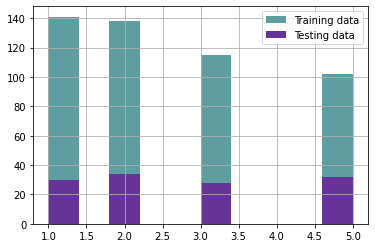

In [11]:
train['Regime'].hist(color = 'cadetblue',label='Training data')
test['Regime'].hist(color = 'rebeccapurple',label='Testing data')
plt.legend()
print('Number of training regimes is:\n',train.groupby(['Regime']).size().reset_index(name='Counts'),'\n')
print('Number of testing regimes is:\n',test.groupby(['Regime']).size().reset_index(name='Counts'),'\n')

In the second test, I have used scatter plots to show the distribution of training and testing data across the 7 Hawaiian islands, as they show a variation in regimes across them. 

I have used latitude and longitude data to plot these scatterpoints, with each island being represented by a different colour.

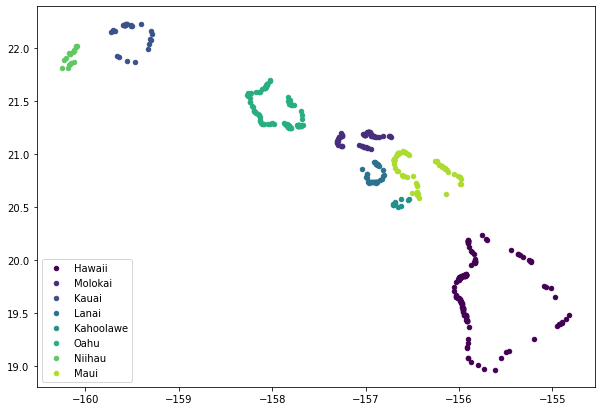

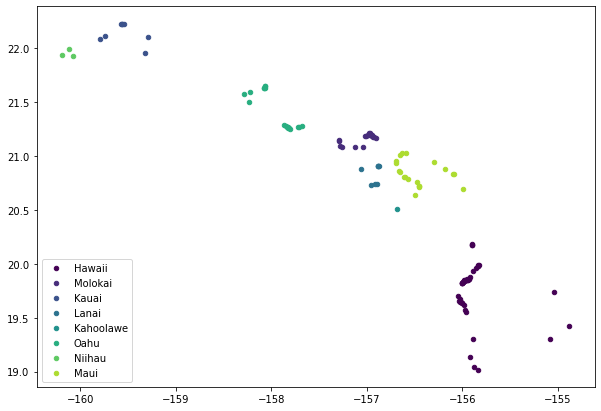

In [12]:
names = list(set(train.Island))

z = range(1, len(names))
colours = plt.get_cmap('viridis')
cNorm = colors.Normalize(vmin=0, vmax=len(names))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=colours)

x = train.Long
y = train.Lat

plt.figure(figsize=(10,7))
for i in range(len(names)):
    index = train['Island'] == names[i]
    plt.scatter(x[index], y[index], s=20, color=scalarMap.to_rgba(i), label=names[i])
plt.legend(loc='lower left')
plt.show()

plt.figure(figsize=(10,7))
for i in range(len(names)):
    index = test['Island'] == names[i]
    plt.scatter(test.Long[index], test.Lat[index], s=20, color=scalarMap.to_rgba(i), label=names[i])
plt.legend(loc='lower left')
plt.show()

In the final test, I have visualized distibution of the regimes across the Hawaiian islands (using methods siilar to the second test).

We can see that the island of Oahu shows the most formation of Regime 1. This can be attributed to it having the capital of Hawaii, Honolulu on it and also being one of the more popular tourist destination as compared to the other islands (leading to destructive activities like water sports and fishing)

By comparision, the island of Hawaii (or Greater Hawaii) has large stretches of Regime 5. This may be because it is the farthest from Oahu and not as popular among tourists than its counterparts.

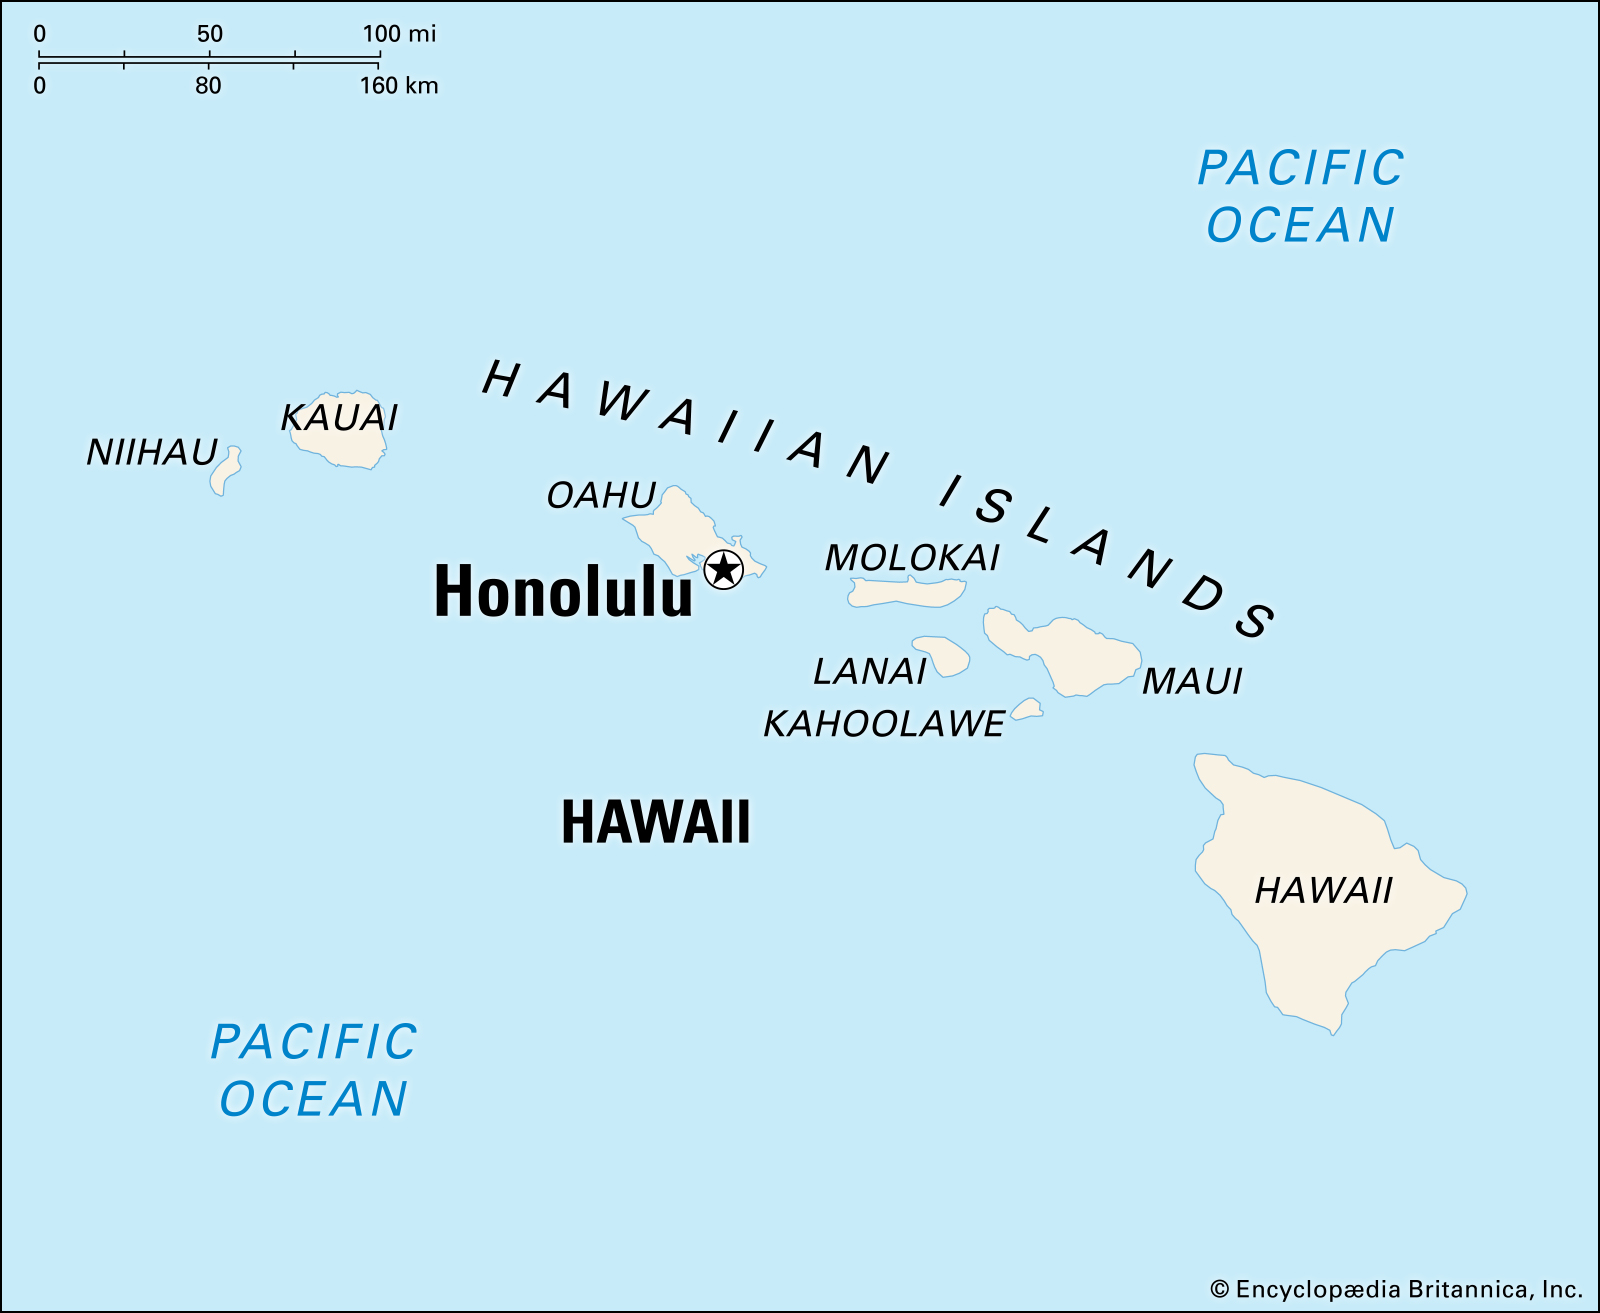

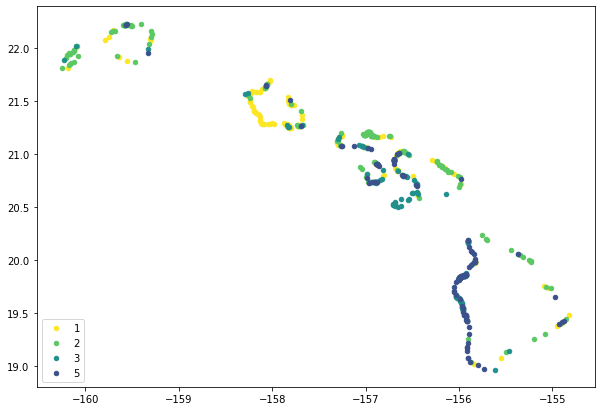

In [13]:
data_kde = pd.read_csv("/content/drive/My Drive/SMA project/Hawaiian_Predictors_revised.csv")

names1 = list(set(data_kde.Regime))

z = range(1, len(names1))
colours = plt.get_cmap('viridis_r')
cNorm = colors.Normalize(vmin=0, vmax=len(names1))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=colours)

x = data_kde.Long
y = data_kde.Lat

plt.figure(figsize=(10,7))
for i in range(len(names1)):
    index = data_kde['Regime'] == names1[i]
    plt.scatter(x[index], y[index], s=20, color=scalarMap.to_rgba(i), label=names1[i])
plt.legend(loc='lower left')
plt.show()


### Correlation matrix

If any of the drivers are found to be highly correlated (>0.7), we can drop them from the dataset. However as seen from the heatmap below, my data is largely uncorrelated, so I can use all the driver data for the model

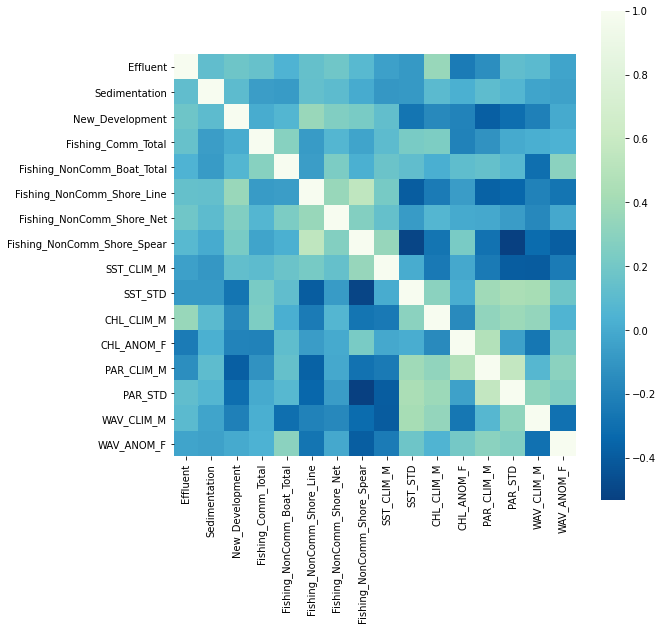

In [14]:
def plot_corr(df, size=9):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap='GnBu_r',square=True, ax=ax)
    
plot_corr(df.iloc[:,14:34])

### Kernel Density Estimation



Regime 1 - low fish biomass, lowest coral cover, highest turf cover

Regime 2 - highest fish biomass, low coral cover, high turf cover

Regime 3 - high fish biomass, moderate coral cover, no macro algae

Regime 5 - moderate fish biomass, highest coral reef cover, lowest turf cover



 Kernel Density Estimation Plot for Benthic communities in Coral Regimes 

Would you like to see the KDE plot with mean or median markers?
Press 1 for mean and 2 for median: 1

 Plotting... 


 Benthic community KDE across 4 regimes with mean markers 



/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


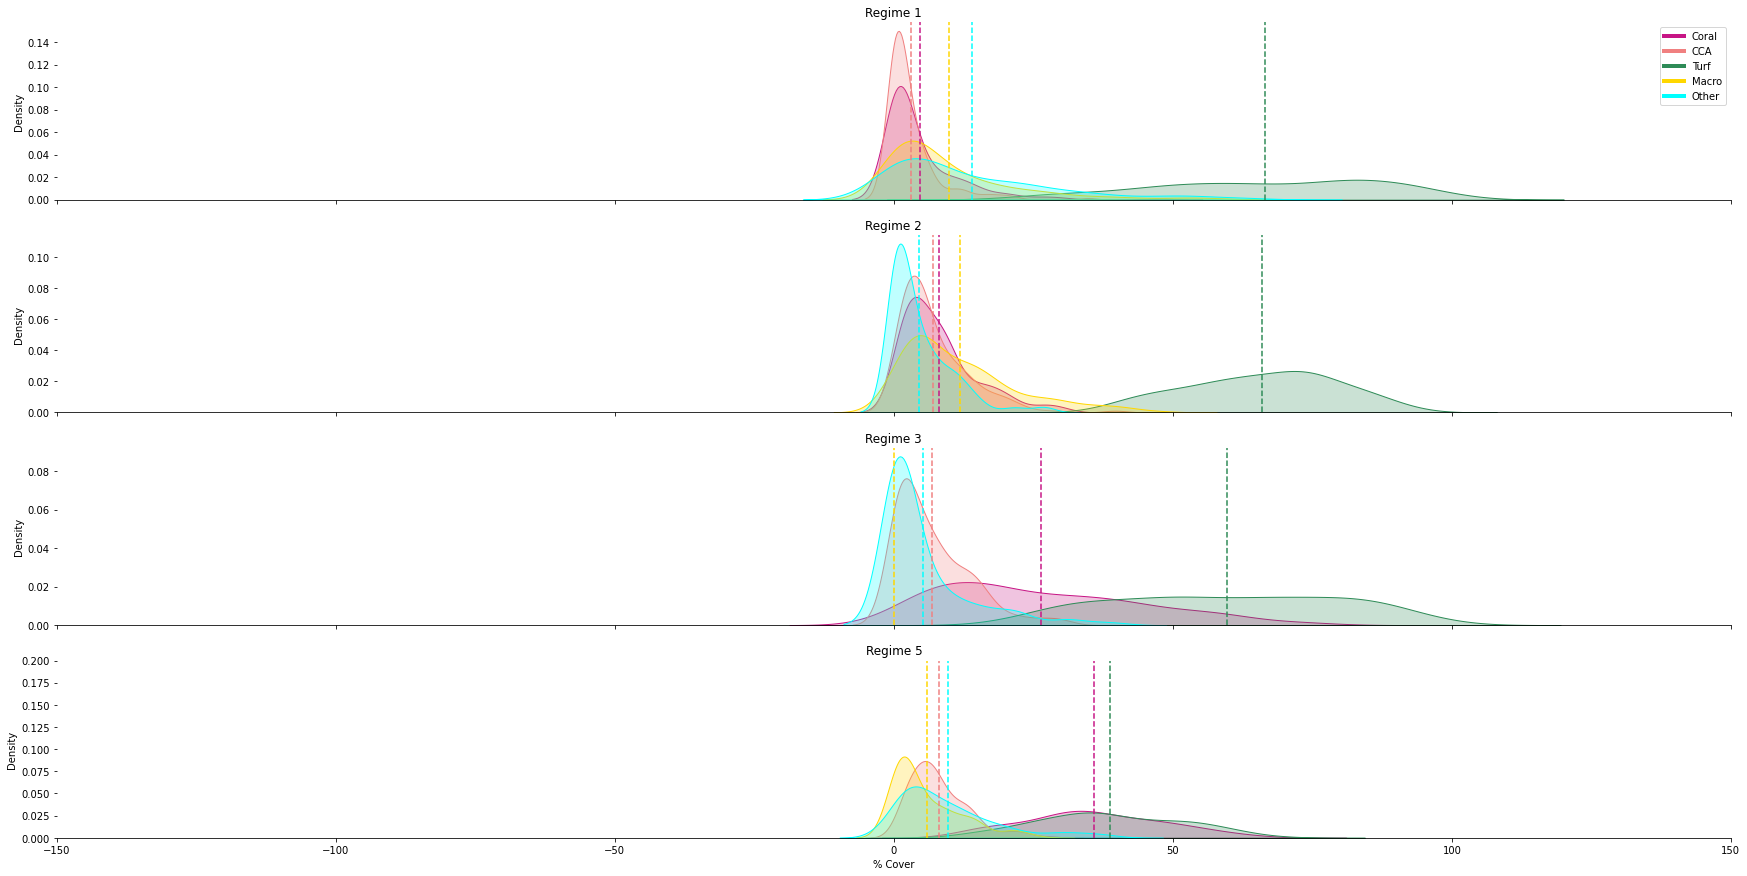

In [15]:
kde_benthic(data_kde = pd.read_csv("/content/drive/My Drive/SMA project/Hawaiian_Predictors_revised.csv"))


 Kernel Density Estimation Plot for Fish communities in Coral Regimes 

Would you like to see the KDE plot with mean or median markers?
Press 1 for mean and 2 for median: 2

 Plotting... 

Fish community KDE across 4 regimes with median markers


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


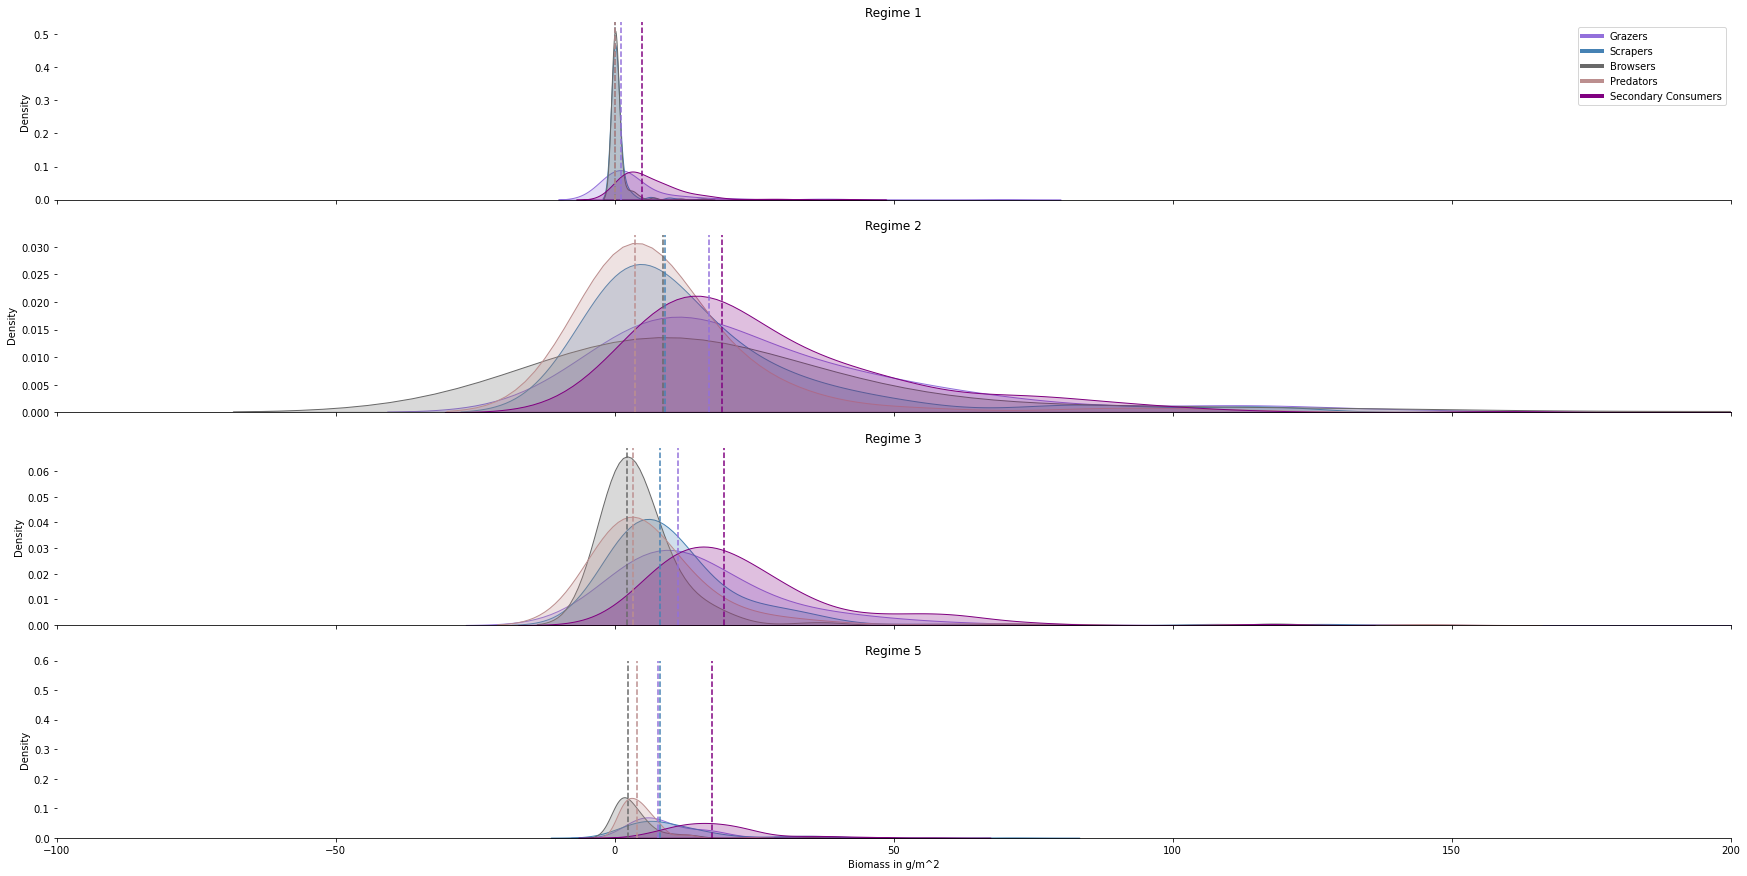

In [16]:
kde_fish(data_kde = pd.read_csv("/content/drive/My Drive/SMA project/Hawaiian_Predictors_revised.csv"))

## Feature Importance Plots

I wanted to understand which of the drivers had the most significant contribution towards formation of a particular regime, and plotted a graph of features and their scores after fitting the data to a KNN Classifier and a Decision Tree Classifier.



In a Logistic Regression Model the top 5 features are:

* 10 SST_CLIM_M	
* 4 Invasive_Algae
* 6 Fishing_NonComm_Boat_Total	
* 5 Fishing_Comm_Total
* 8 Fishing_NonComm_Shore_Net	


Feature: 0, Score: -0.00194
Feature: 1, Score: 0.00452
Feature: 2, Score: 0.00903
Feature: 3, Score: -0.00065
Feature: 4, Score: 0.04355
Feature: 5, Score: 0.05419
Feature: 6, Score: 0.05935
Feature: 7, Score: 0.01323
Feature: 8, Score: 0.02968
Feature: 9, Score: -0.00032
Feature: 10, Score: 0.07935
Feature: 11, Score: 0.02581
Feature: 12, Score: 0.03323
Feature: 13, Score: 0.00710
Feature: 14, Score: 0.01194
Feature: 15, Score: 0.00419
Feature: 16, Score: 0.02226
Feature: 17, Score: -0.00355


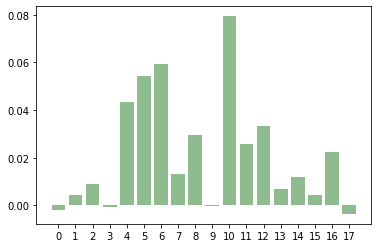

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import permutation_importance
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler


y = df.loc[:,'Regime':'Regime'].values
X = df.loc[:,'Effluent':'WAV_ANOM_F'].values

y = y.reshape(620,)

scaler = StandardScaler()
scaler.fit(X)
X=scaler.transform(X)

model = LogisticRegression()
model.fit(X, y)
results = permutation_importance(model, X, y, scoring='accuracy')
importance = results.importances_mean
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
pyplot.bar([x for x in range(len(importance))], importance , color = 'darkseagreen')
plt.xticks(np.arange(0, 18, step=1))
pyplot.show()

In Decision Tree Classifier the top 5 features are:

* 6 Fishing_NonComm_Boat_Total
* 16 WAV_CLIM_M	
* 17 WAV_ANOM_F
* 9 Fishing_NonComm_Shore_Spear	
* 2 New_Development



Feature: 0, Score: 0.05126
Feature: 1, Score: 0.04413
Feature: 2, Score: 0.07382
Feature: 3, Score: 0.00108
Feature: 4, Score: 0.00550
Feature: 5, Score: 0.01725
Feature: 6, Score: 0.21809
Feature: 7, Score: 0.05043
Feature: 8, Score: 0.03486
Feature: 9, Score: 0.05766
Feature: 10, Score: 0.02375
Feature: 11, Score: 0.03767
Feature: 12, Score: 0.01618
Feature: 13, Score: 0.00632
Feature: 14, Score: 0.04022
Feature: 15, Score: 0.05494
Feature: 16, Score: 0.17884
Feature: 17, Score: 0.08801


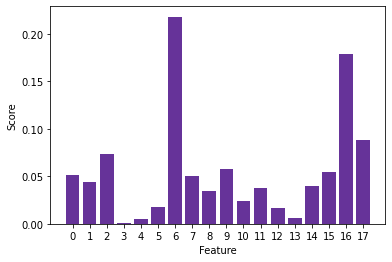

In [18]:
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler

y = df.loc[:,'Regime':'Regime'].values
X = df.loc[:,'Effluent':'WAV_ANOM_F'].values

y = y.reshape(620,)

scaler = StandardScaler()
scaler.fit(X)
X=scaler.transform(X)

model1 = DecisionTreeClassifier()
model1.fit(X, y)
importance = model1.feature_importances_
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
pyplot.bar([x for x in range(len(importance))], importance, color = 'rebeccapurple')
plt.xticks(np.arange(0, 18, step=1))
plt.xlabel('Feature')
plt.ylabel('Score')
pyplot.show()


In Random Forest Classifier the top 5 features are:

* 16 WAV_CLIM_M	
* 6 Fishing_NonComm_Boat_Total
* 9 Fishing_NonComm_Shore_Spear
* 17 WAV_ANOM_F
* 2 New_Development



Feature: 0, Score: 0.04404
Feature: 1, Score: 0.04582
Feature: 2, Score: 0.07287
Feature: 3, Score: 0.00373
Feature: 4, Score: 0.00944
Feature: 5, Score: 0.04743
Feature: 6, Score: 0.11410
Feature: 7, Score: 0.03177
Feature: 8, Score: 0.02862
Feature: 9, Score: 0.08860
Feature: 10, Score: 0.05892
Feature: 11, Score: 0.07121
Feature: 12, Score: 0.05347
Feature: 13, Score: 0.03461
Feature: 14, Score: 0.03856
Feature: 15, Score: 0.06301
Feature: 16, Score: 0.11097
Feature: 17, Score: 0.08283


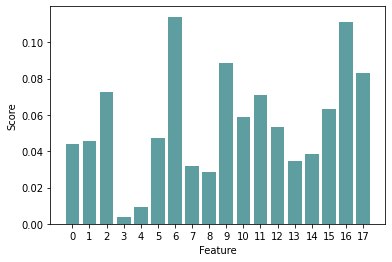

In [19]:
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot

y = df.loc[:,'Regime':'Regime'].values
X = df.loc[:,'Effluent':'WAV_ANOM_F'].values

y = y.reshape(620,)

scaler = StandardScaler()
scaler.fit(X)
X=scaler.transform(X)

model1 = RandomForestClassifier()
model1.fit(X, y)
importance = model1.feature_importances_
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
pyplot.bar([x for x in range(len(importance))], importance, color = 'cadetblue')
plt.xticks(np.arange(0, 18, step=1))
plt.xlabel('Feature')
plt.ylabel('Score')
pyplot.show()

## Recursive Feature Elimination

There are two important factors which affect the result of RFE: 
- number of features selected 
- algorithm used to choose features 

For this example, I have used the SVC algorithm and selected the top 5 features.


From the heatmap, we can see that the top 5 selected features are:

If we eliminate 1 feature in every recursion

*   4 Fishing_NonComm_Boat_Total	
*   5 Fishing_NonComm_Shore_Line	
*   10 CHL_CLIM_M	
*   11 CHL_ANOM_F	
*   12 PAR_CLIM_M	

If we eliminate 2 features in every recursion

* 4 Fishing_NonComm_Boat_Total
* 6 Fishing_NonComm_Boat_Total
* 10 CHL_CLIM_M	
* 11 CHL_ANOM_F
* 16 WAV_CLIM_M	


Feature [0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17]
Ranking [8 5 4 7 1 3 1 7 3 4 1 1 2 8 5 6 1 6]


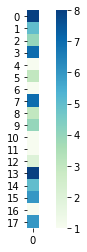

In [20]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFE

y = df.loc[:,'Regime':'Regime'].values
X = df.loc[:,'Effluent':'WAV_ANOM_F'].values

y = y.reshape(620,)
scaler = StandardScaler()
scaler.fit(X)
X=scaler.transform(X)

svc = SVC(kernel="linear", C=1)
rfe = RFE(estimator=svc, n_features_to_select=5, step=2)
rfe.fit(X, y)
ranking = rfe.ranking_.reshape(18,1)

#print('Feature','[00 01 02 03 04 05 06 07 08 09 10 11 12 13 14 15 16 17]')
print('Feature','[0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17]')
print('Ranking',rfe.ranking_)
sns.heatmap(ranking, cmap='GnBu',square=True)

## Boxplot for RFE

Based on the top 5 features selected via RFE, we study the statistical parameters of the features with respect to the regime

In plots which show outliers, the box and whiskers chart may not show the corre t max/min value. We can consider that the whiskers represent 1.5 x IQR

#### Boxplot for Regime vs Total Non-commercial Fishing using boats

* Regime 1 - Non-commercial Fishing using boats has max distribution in this regime, median value is in lower half of the interquartile range

The other 3 regimes have minimum distribution of Non-commercial Fishing using boats
* Regime 2 - shows outliers
* Regime 3 - shows outliers, distribution is similar to regime 5
* Regime 5 - shows outliers, distribution is similar to regime 3

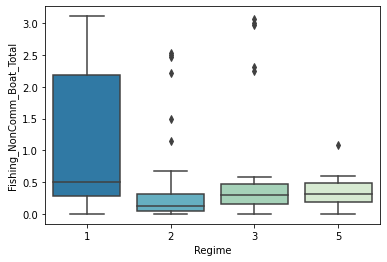

In [21]:
sns.boxplot(x='Regime', y="Fishing_NonComm_Boat_Total", palette ='GnBu_r',data=df)

#### Boxplot for Regime vs Total Non-commercial Fishing using shore lines

* Regime 1 - Low distribution of Non-commercial Fishing using shore lines, shows outliers, median is nearly = 0
* Regime 2 - Low distribution of Non-commercial Fishing using shore lines, shows outliers, median is nearly = 0
* Regime 3 - High distribution of Non-commercial Fishing using shore lines, low dian value
* Regime 5 - High distribution of Non-commercial Fishing using shore lines, median value is almost towards the centre of interquartile range

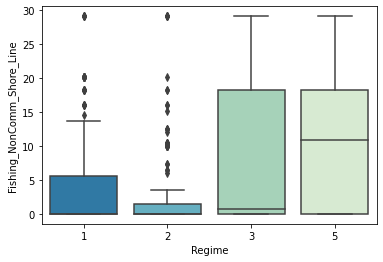

In [22]:
sns.boxplot(x="Regime", y="Fishing_NonComm_Shore_Line", palette ='GnBu_r',data=df)


#### Boxplot for Regime vs  maximum monthly mean value of Chlorophyll-a

Overall distribution is low as chlorophyll-a is found in Coralline algae which is lower in all regimes as compared to other benthic communities


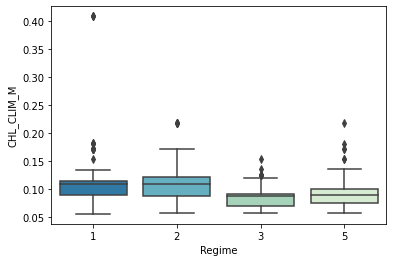

In [23]:
sns.boxplot(x="Regime", y="CHL_CLIM_M", palette ='GnBu_r',data=df)


#### Boxplot for Regime vs annual anomaly frequency value of Chlorophyll-a

Annual anomalies are calculated by subtracting the long term annual mean from each individual annual mean.

* Regime 1 -  Moderate distribution of annual anomaly frequency value of Chlorophyll-a, median is towards the upper end of IQR, shows single outlier
* Regime 2 - Moderate distribution of annual anomaly frequency value of Chlorophyll-a, median is towards the lower end of IQR, shows outliers
* Regime 3 - High distribution of annual anomaly frequency value of Chlorophyll-a, median is approximately towards the centre of IQR
* Regime 5 - High distribution of annual anomaly frequency value of Chlorophyll-a, median is approximately towards the centre of IQR

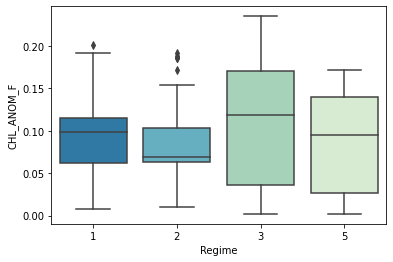

In [24]:
sns.boxplot(x="Regime", y="CHL_ANOM_F", palette ='GnBu_r',data=df)


#### Boxplot for Regime vs maximum monthly mean of solar irradiance

* Regime 1
* Regime 2
* Regime 3
* Regime 5

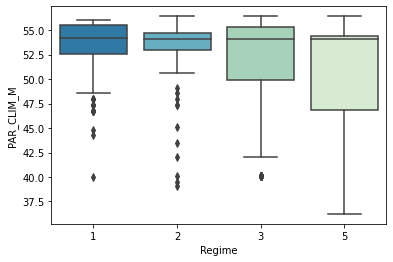

In [25]:
sns.boxplot(x="Regime", y="PAR_CLIM_M", palette ='GnBu_r',data=df)

## Partial Dependancy plots

Partial dependence plots show the marginal effect one or two features have on the predicted outcome of a machine learning model

Partial dependence plots for anthropogenic factors




| |          #                                        | 0 Elapsed Time: 0:00:01

(<Figure size 3600x5400 with 7 Axes>,
  <matplotlib.axes._subplots.AxesSubplot at 0x7f0912671cf8>])

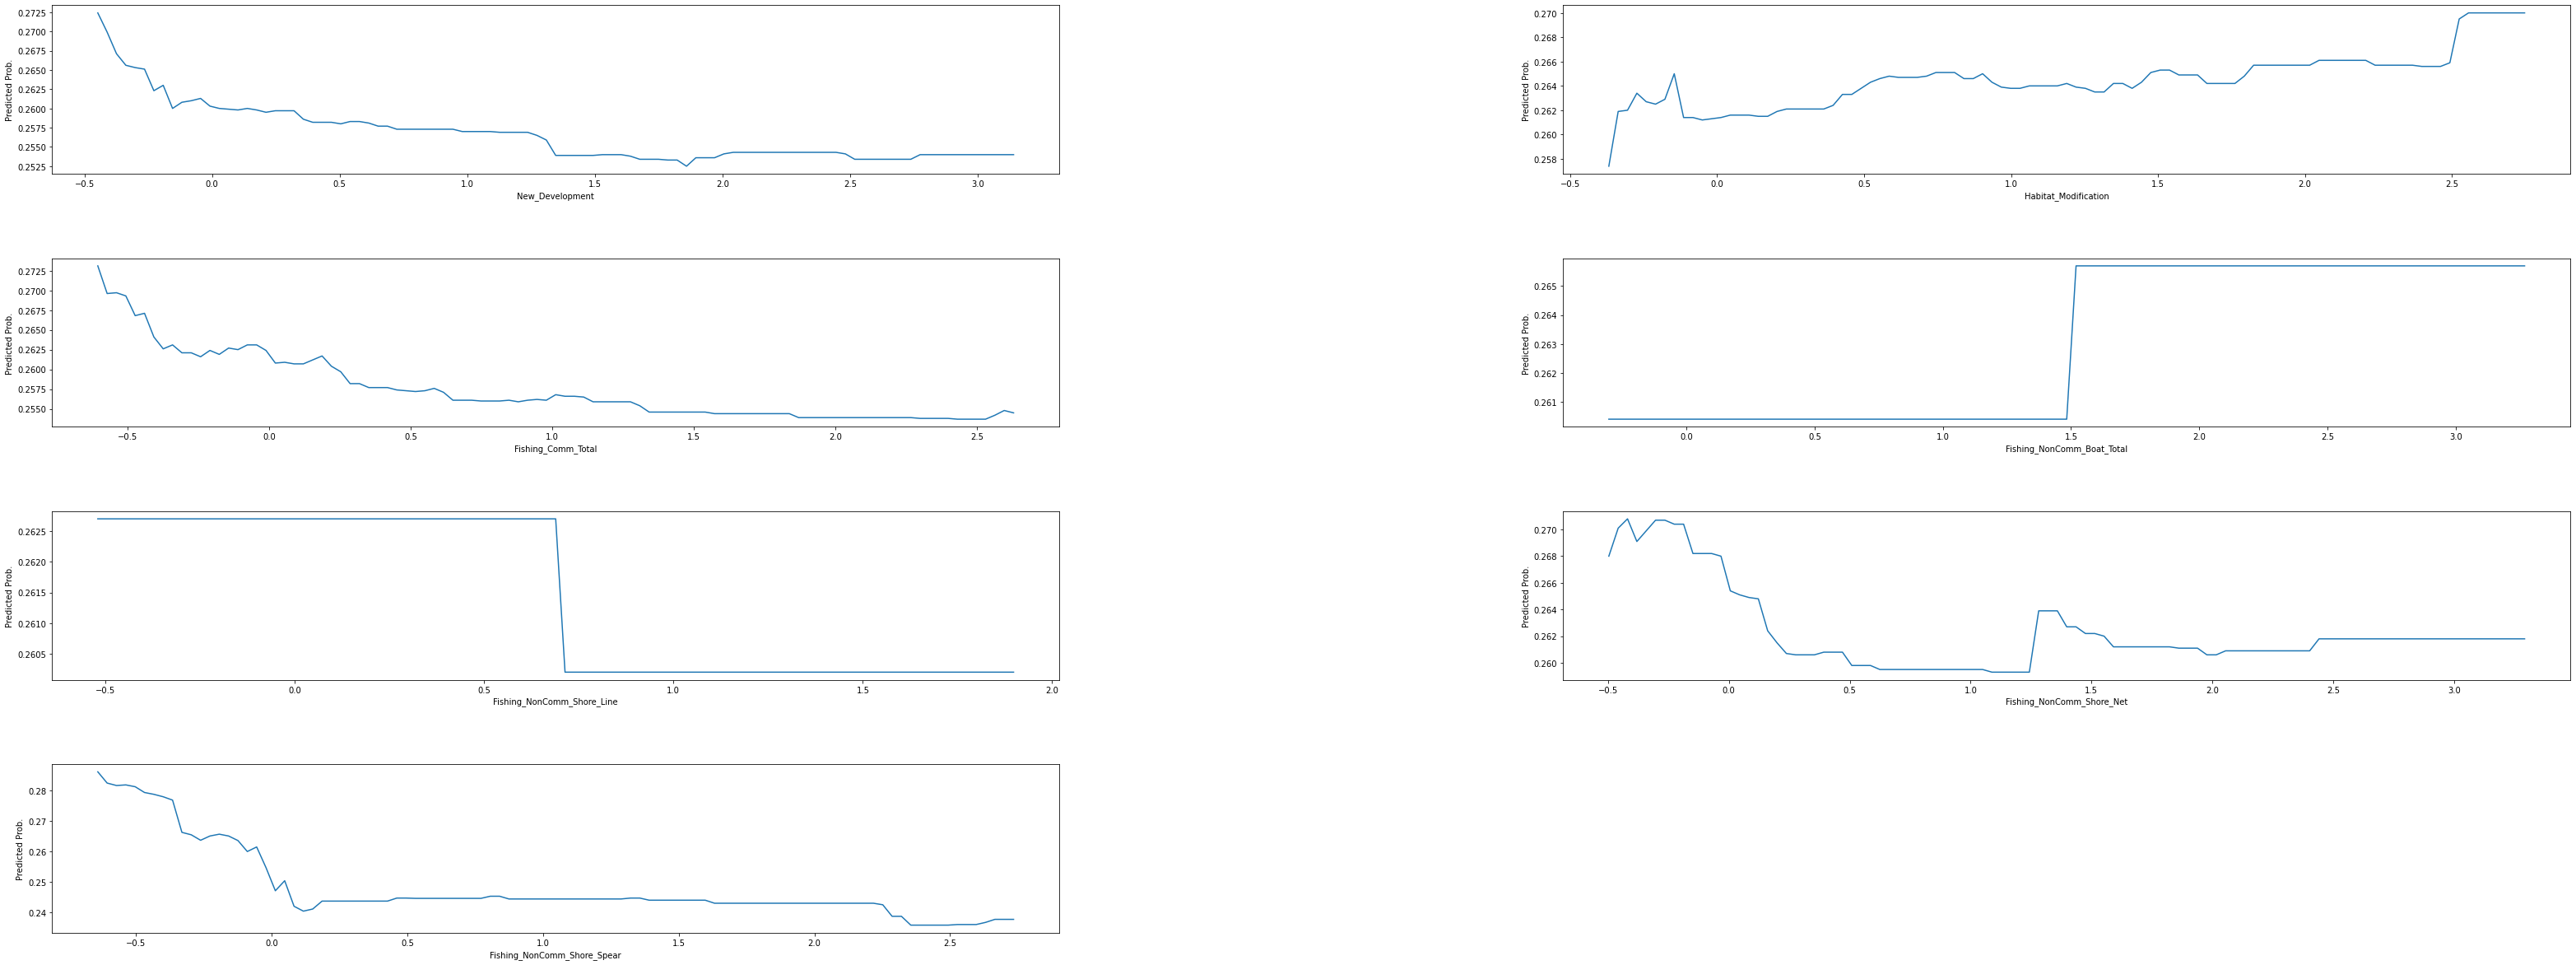

In [108]:

X = df.iloc[:,14:34].values
y = df.loc[:,'Regime':'Regime'].values

y = y.reshape(620,)
scaler = StandardScaler()
scaler.fit(X)
X=scaler.transform(X)

model1 = RandomForestClassifier()
model1.fit(X, y)
features = ['New_Development', 'Habitat_Modification',	'Fishing_Comm_Total',	'Fishing_NonComm_Boat_Total',	'Fishing_NonComm_Shore_Line',	'Fishing_NonComm_Shore_Net',	'Fishing_NonComm_Shore_Spear']

plot_partial_dependences(clf = model1, data = X, feature_names = features, cluster = True, n_plot_cols = 2)

Partial dependence plots for biological factors


| |            #                                      | 0 Elapsed Time: 0:00:01

(<Figure size 3600x5400 with 11 Axes>,
  <matplotlib.axes._subplots.AxesSubplot at 0x7f09101ff4e0>])

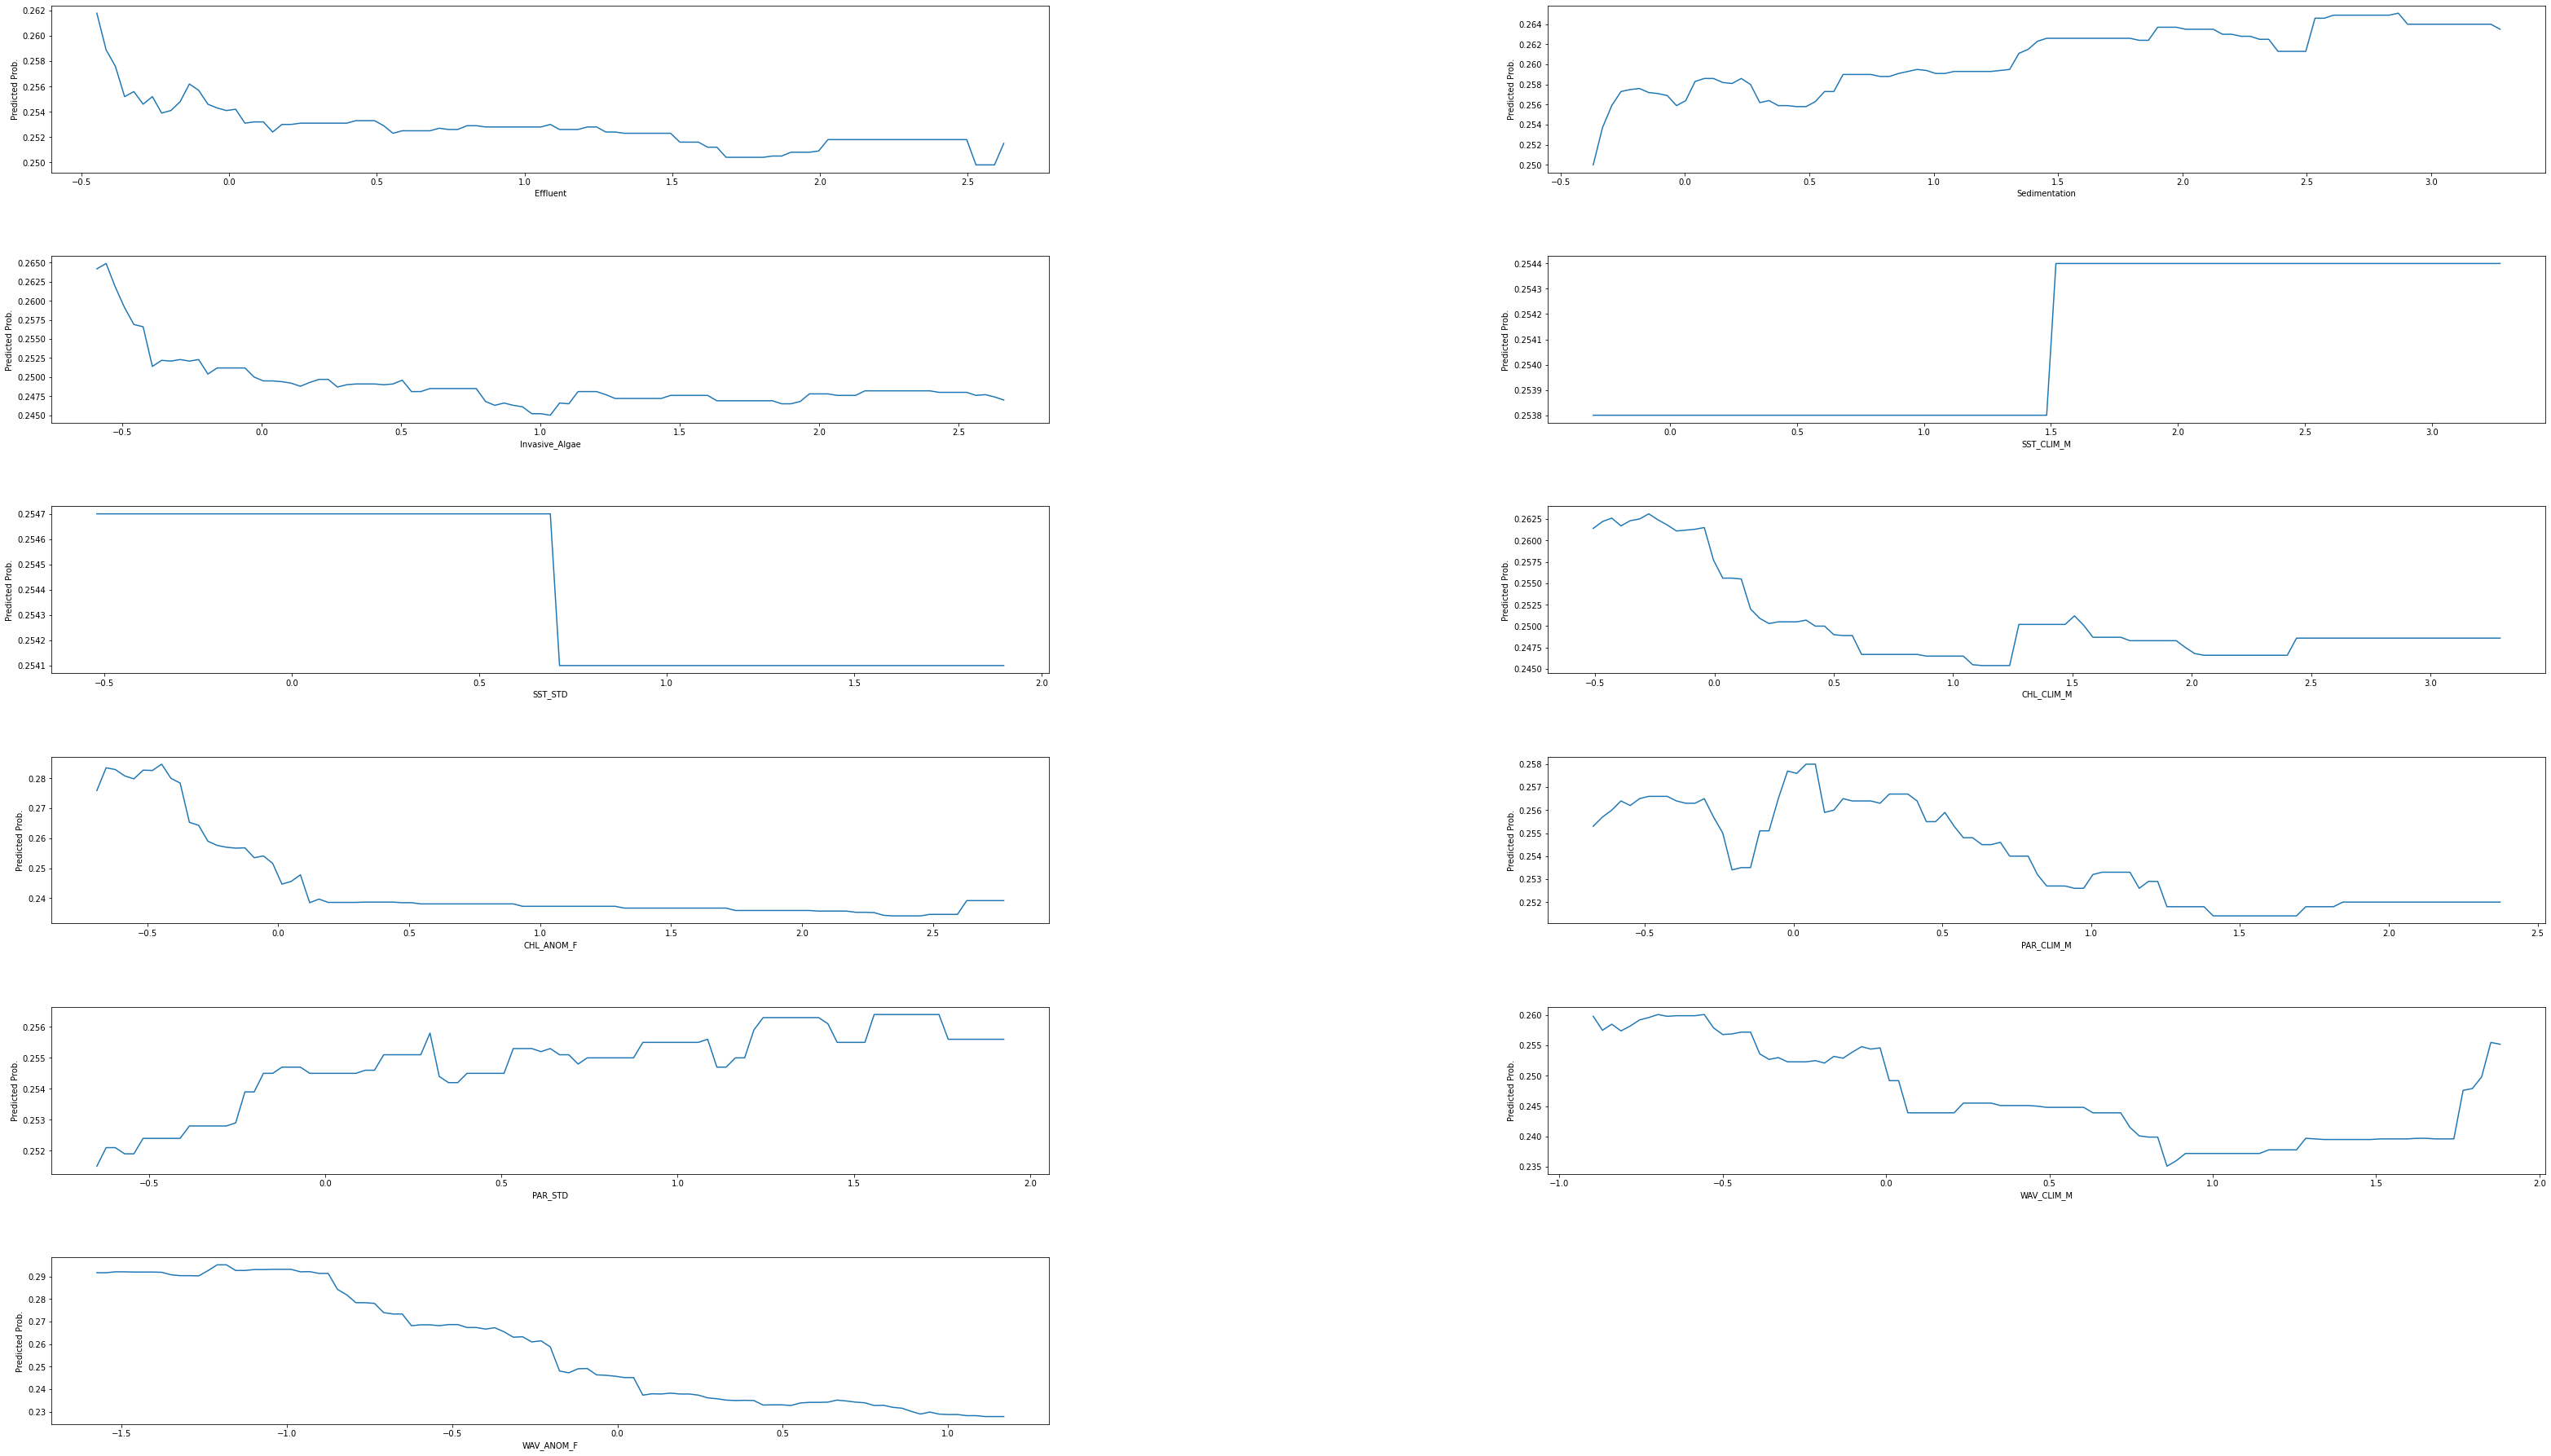

In [109]:

X = df.iloc[:,14:34].values
y = df.loc[:,'Regime':'Regime'].values

y = y.reshape(620,)
scaler = StandardScaler()
scaler.fit(X)
X=scaler.transform(X)

model1 = RandomForestClassifier()
model1.fit(X, y)
features = ['Effluent'	,'Sedimentation',	'Invasive_Algae', 'SST_CLIM_M',	'SST_STD'	,'CHL_CLIM_M',	'CHL_ANOM_F',	'PAR_CLIM_M',	'PAR_STD',	'WAV_CLIM_M',	'WAV_ANOM_F']
plot_partial_dependences(clf = model1, data = X, feature_names = features, cluster = True, n_plot_cols = 2)